In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import plotly.express as px

import datetime
from scipy.stats import skew

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ConElec.csv')

In [ ]:
df.shape

(1648824, 20)

In [ ]:
df.isnull().sum()

,0
fsn_id,0
order_date,0
Year,0
Month,0
order_id,0
order_item_id,0
gmv,0
units,0
deliverybdays,0
deliverycdays,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1648824 non-null  object 
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    1648824 non-null  object 
 9   deliverycdays                    1648824 non-null  object 
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

In [ ]:
df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'])

print(df.dtypes)

fsn_id                                     object
order_date                         datetime64[ns]
Year                                        int64
Month                                       int64
order_id                                  float64
order_item_id                             float64
gmv                                        object
units                                       int64
deliverybdays                              object
deliverycdays                              object
s1_fact.order_payment_type                 object
sla                                         int64
cust_id                                    object
pincode                                    object
product_analytic_super_category            object
product_analytic_category                  object
product_analytic_sub_category              object
product_analytic_vertical                  object
product_mrp                                 int64
product_procurement_sla                     int64


In [ ]:
#Handling irrelavant data types

df["Year"]= df["Year"].astype(int)
df["Month"]= df["Month"].astype(int)



In [ ]:
df['gmv'] = pd.to_numeric(df['gmv'], errors='coerce')
df['gmv'] = df['gmv'].fillna(0)
df["gmv"]= df["gmv"].astype(int)


df['cust_id'] = pd.to_numeric(df['cust_id'], errors='coerce')
df['cust_id'] = df['cust_id'].fillna(0)


df['pincode'] = pd.to_numeric(df['pincode'], errors='coerce')
df['pincode'] = df['pincode'].fillna(0)

In [ ]:
df["s1_fact.order_payment_type"].value_counts()

,count
s1_fact.order_payment_type,
COD,1191443
Prepaid,457381


In [ ]:
df["product_analytic_category"].value_counts()

,count
product_analytic_category,
EntertainmentSmall,944698
CameraAccessory,257493
GamingHardware,230958
GameCDDVD,114503
Camera,101172


In [ ]:
df["product_analytic_sub_category"].value_counts()

,count
product_analytic_sub_category,
Speaker,543928
CameraAccessory,239508
GamingAccessory,201899
TVVideoSmall,142995
HomeAudio,124860
Game,114406
AudioMP3Player,112892
Camera,101172
GamingConsole,29059


In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
order_date,1648824,2016-01-10 05:24:13.429956608,2015-05-19 13:42:09,2015-10-16 17:40:54.249999872,2016-01-07 12:39:11.500000,2016-04-01 13:12:09.500000,2016-07-25 01:19:45,NaN
Year,1648824.0,2015.518555,2015.0,2015.0,2016.0,2016.0,2016.0,0.499656
Month,1648824.0,6.58565,1.0,3.0,6.0,10.0,12.0,3.623351
order_id,1648824.0,2842444674146622.0,76331515.0,1602588503969575.0,2611824528743350.0,3610613539366250.0,5395076790260600.0,1269134332596903.5
order_item_id,1648824.0,13756277530325592.0,108016495.0,1606725138262300.0,2619185472741150.0,4397705931628400.0,300037347717704000.0,55945981798628056.0
gmv,1648824.0,2453.803858,0.0,339.0,749.0,1999.0,226947.0,5612.080628
units,1648824.0,1.022087,1.0,1.0,1.0,1.0,50.0,0.253532
sla,1648824.0,5.687832,0.0,4.0,6.0,7.0,1006.0,2.983336
cust_id,1648824.0,-7036694961914080.0,-9223350545281059840.0,-4603053788010787840.0,0.0,4589762297030790144.0,9223362162226820096.0,5319135676421964800.0
pincode,1648824.0,99914695674114880.0,-9221830354194010112.0,-4405798775245490176.0,122432559963907008.0,4771923573051750400.0,9222980202332239872.0,5305074846267633664.0


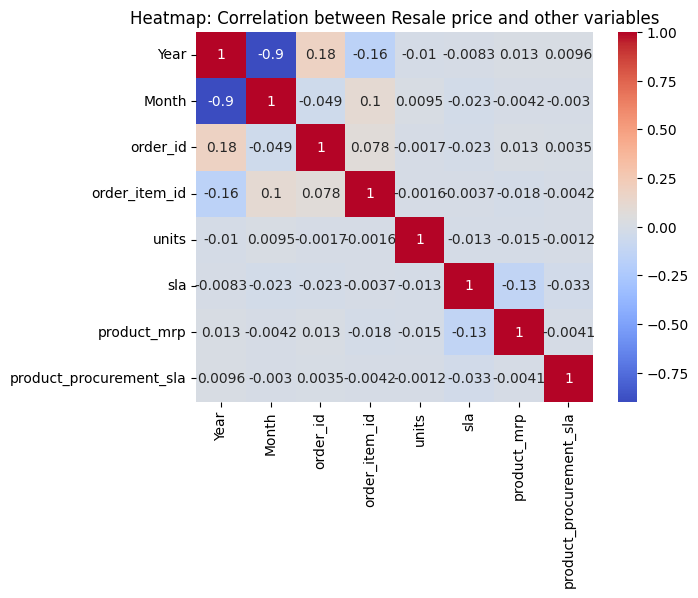

In [ ]:
sns.heatmap(df[['Year', 'Month', 'order_id', 'order_item_id',"units","sla","product_mrp","product_procurement_sla"]].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap: Correlation between Resale price and other variables')
plt.show()

In [ ]:
import calendar

# Grouping the product sold by month and product analytic category
total_units_by_month_prod = df.groupby(['Month', 'product_analytic_category']).size().reset_index(name='total_units')

# Convert month integers to month names
total_units_by_month_prod['Month'] = total_units_by_month_flat_model['Month'].apply(lambda x: calendar.month_abbr[x])

fig = px.line_polar(total_units_by_month_prod, r="total_units", theta="Month", color="product_analytic_category", line_close=True,
                    color_discrete_sequence=px.colors.sequential.Plasma_r,
                    template="plotly_dark",)
fig.show()


In [ ]:
df_year = df.groupby(['Year', 'product_analytic_category']).size().reset_index(name='count')

fig = px.bar(df_year, x='Year', y='count', color='product_analytic_category', title='Stacked Bar Chart: product_analytic_category vs Year',
             labels={'count': 'Count', 'Year': 'Year', 'product_analytic_category': 'product_analytic_category'}, barmode='stack', color_discrete_sequence=px.colors.sequential.Viridis)

fig.update_layout(xaxis=dict(tickmode='linear', tickangle=45))
fig.show()


In [ ]:
df["product_analytic_vertical"].value_counts()

,count
product_analytic_vertical,
LaptopSpeaker,287850
MobileSpeaker,250250
AudioMP3Player,112892
PhysicalGame,105061
HomeAudioSpeaker,85607
...,...
ReflectorUmbrella,3
FlashShoeAdapter,2
KaraokePlayer,2


In [ ]:

# detecting the skewed columns using plot

def skewplot(df, column):
    plt.figure(figsize=(20, 4))

    # Distplot
    plt.subplot(1, 3, 1)
    sns.distplot(df[column], kde=True)
    plt.title("Distplot for " + column)


    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(df[column])
    plt.title("Box plot for " + column)

    # Violin plot
    plt.subplot(1, 3, 3)
    sns.violinplot(df[column])
    plt.title("Violin plot for " + column)

    plt.tight_layout()
    plt.show()

<ipython-input-17-ec0408c78dcf>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




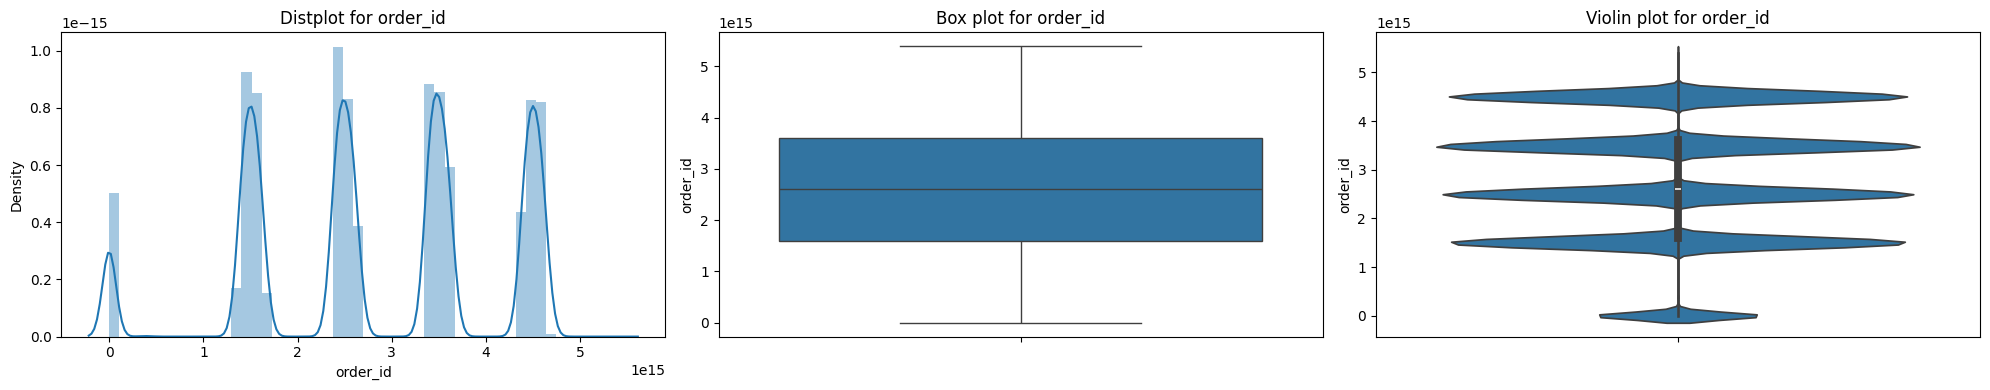

<ipython-input-17-ec0408c78dcf>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




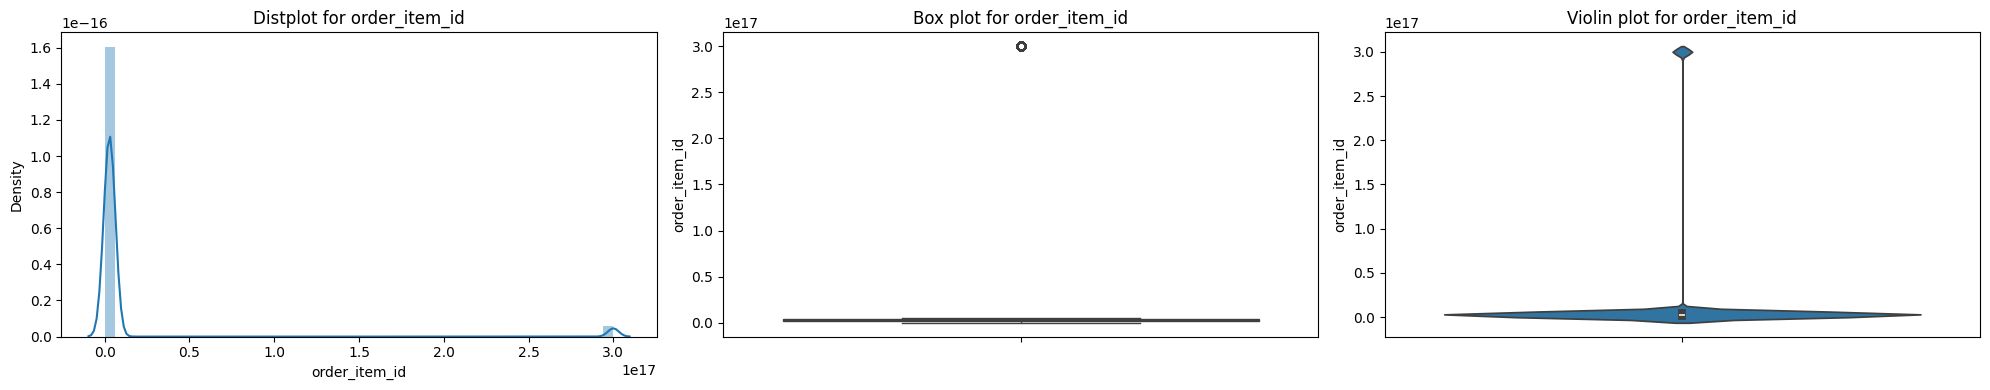

<ipython-input-17-ec0408c78dcf>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




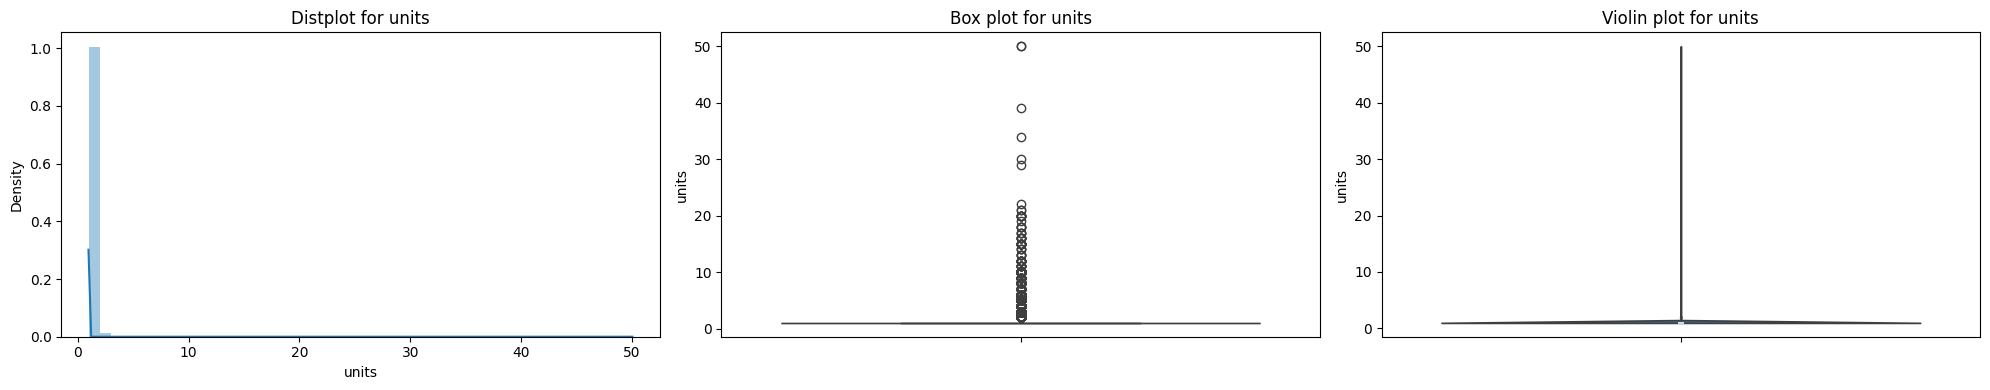

<ipython-input-17-ec0408c78dcf>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




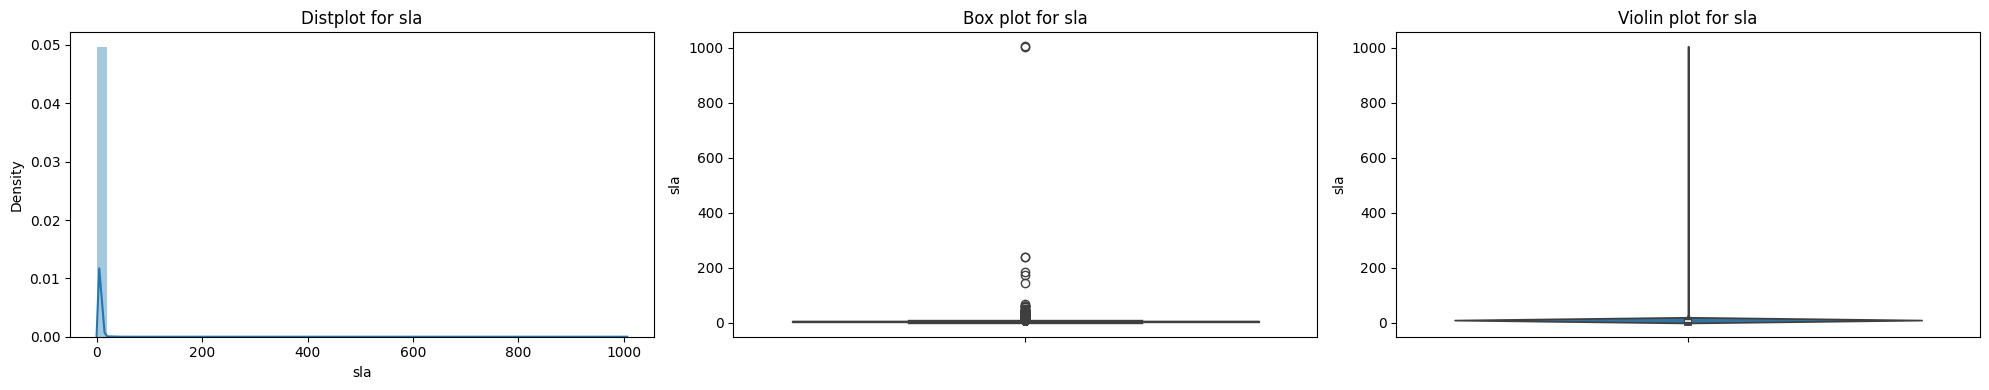

<ipython-input-17-ec0408c78dcf>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




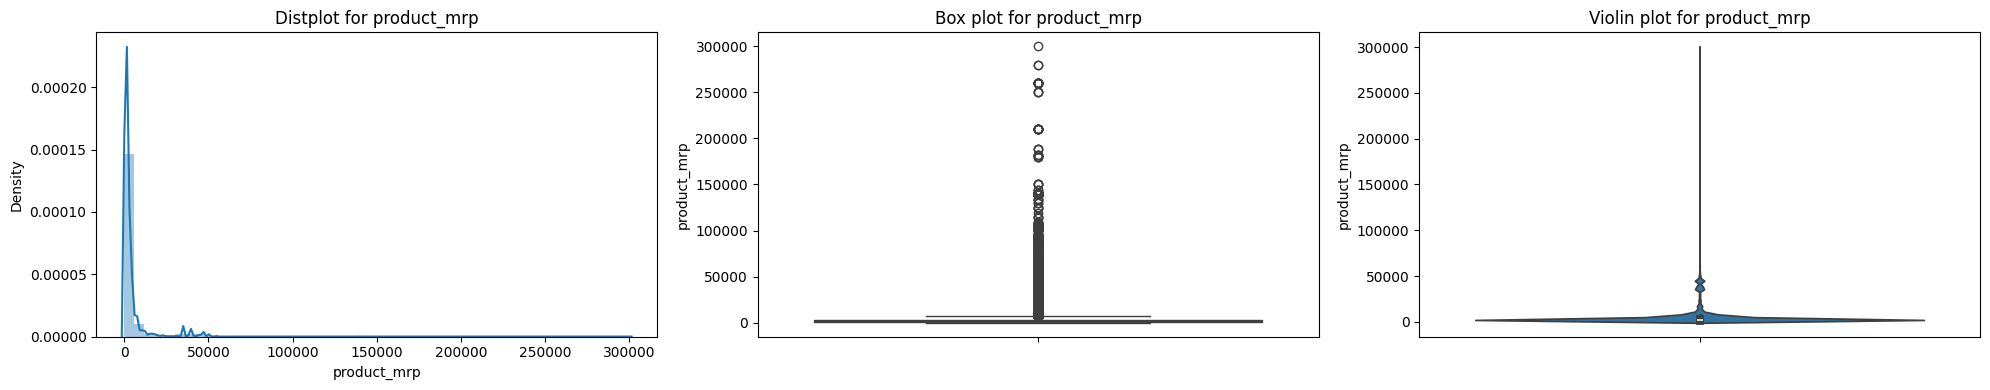

<ipython-input-17-ec0408c78dcf>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




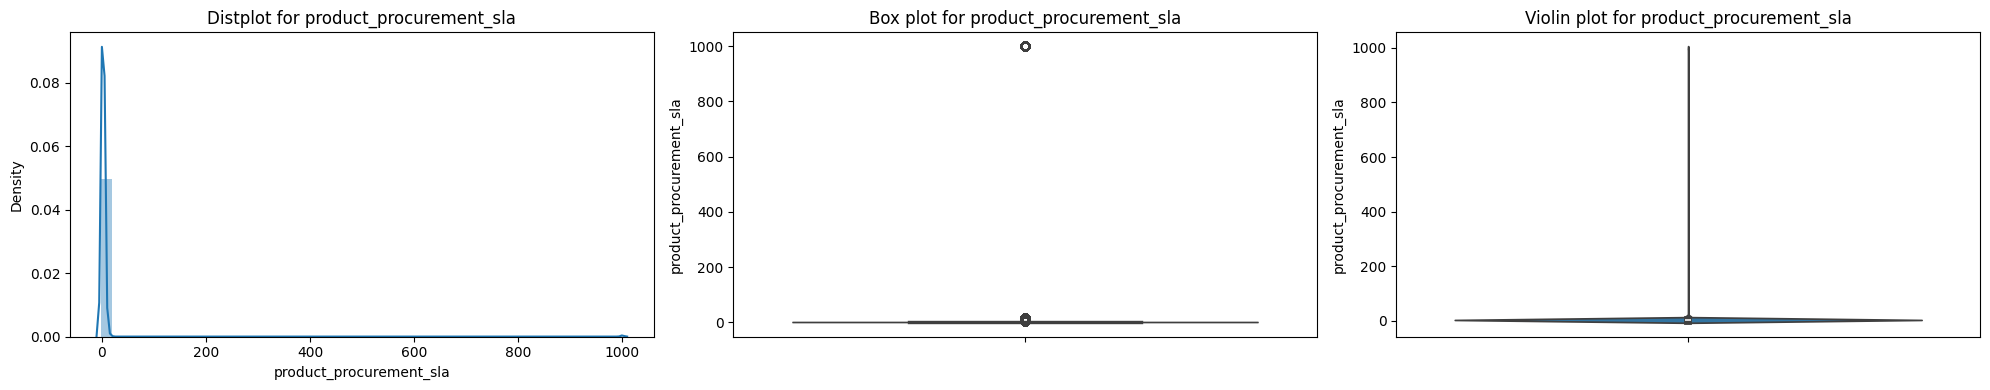

In [ ]:
skewed_columns=['order_id', 'order_item_id',"units","sla","product_mrp","product_procurement_sla"]

for column in skewed_columns:
    skewplot(df, column)

In [ ]:
for column in skewed_columns:
    skewness = df[column].skew()
    print(f'Skewness of {column}: {skewness}')


Skewness of order_id: -0.3337359873849517
Skewness of order_item_id: 4.9189830469584965
Skewness of units: 35.55456195515764
Skewness of sla: 47.044207058669876
Skewness of product_mrp: 4.7746798390086935
Skewness of product_procurement_sla: 18.525058692054532


In [ ]:
from scipy import stats

for column in ['order_item_id', 'units', 'product_procurement_sla']:
    df['boxcox_' + column], _ = stats.boxcox(df[column].clip(lower=1))  # Apply Box-Cox


In [ ]:
for column in ['boxcox_order_item_id', 'boxcox_units', 'boxcox_product_procurement_sla']:
    print(f'Skewness of {column}: {df[column].skew()}')   # skew range for each columns


Skewness of boxcox_order_item_id: 0.7232782915546462
Skewness of boxcox_units: 7.962990786691049
Skewness of boxcox_product_procurement_sla: -0.024499452259126163


In [ ]:

for column in ['order_id', 'product_mrp', 'sla']:
    df['boxcox_' + column], _ = stats.boxcox(df[column].clip(lower=1))

In [ ]:
for column in ['boxcox_order_id', 'boxcox_sla', 'boxcox_product_mrp']:
    print(f'Skewness of {column}: {df[column].skew()}')

Skewness of boxcox_order_id: -1.3444274596566095
Skewness of boxcox_sla: 0.15891321950794388
Skewness of boxcox_product_mrp: 0.010565740634202988


<ipython-input-17-ec0408c78dcf>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




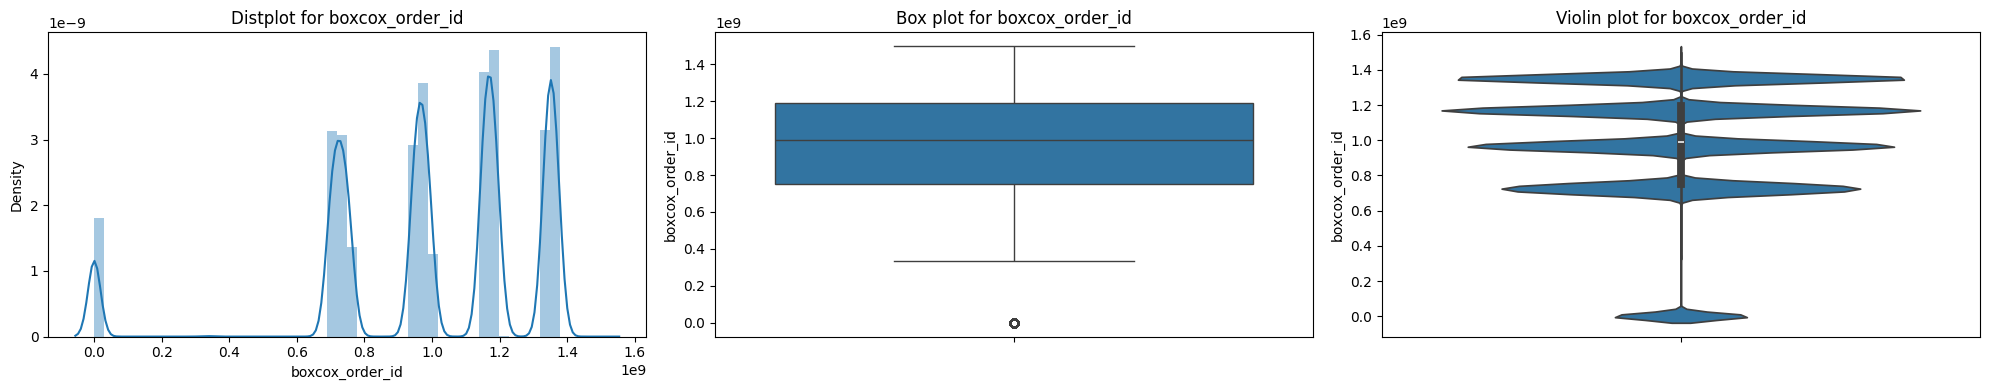

<ipython-input-17-ec0408c78dcf>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




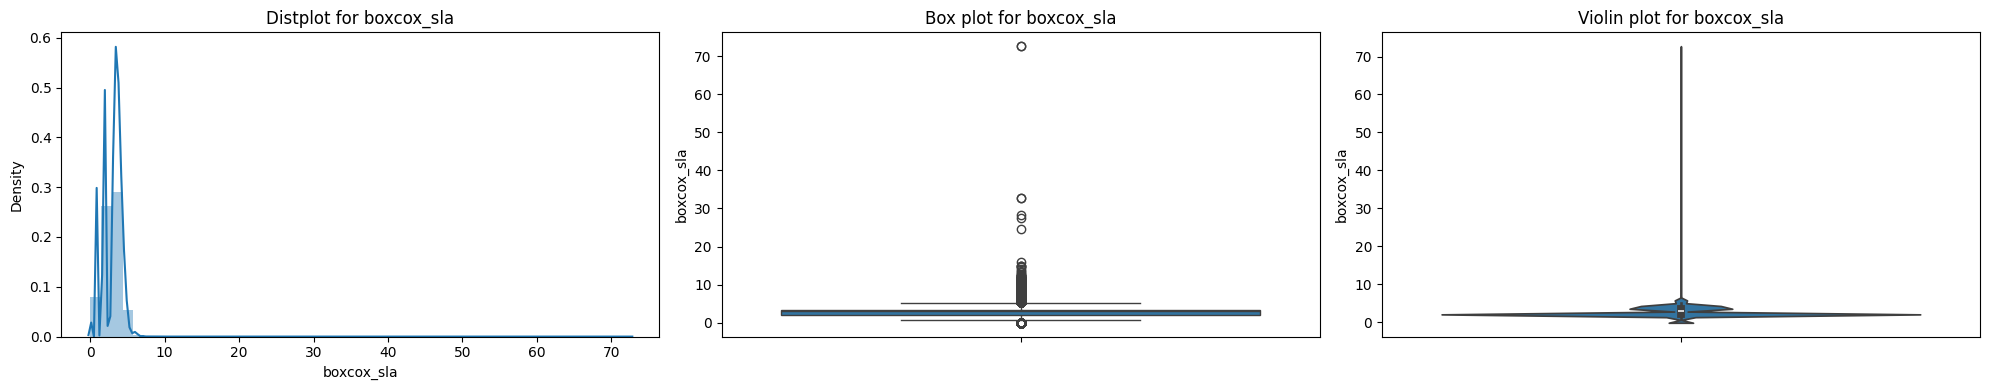

<ipython-input-17-ec0408c78dcf>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




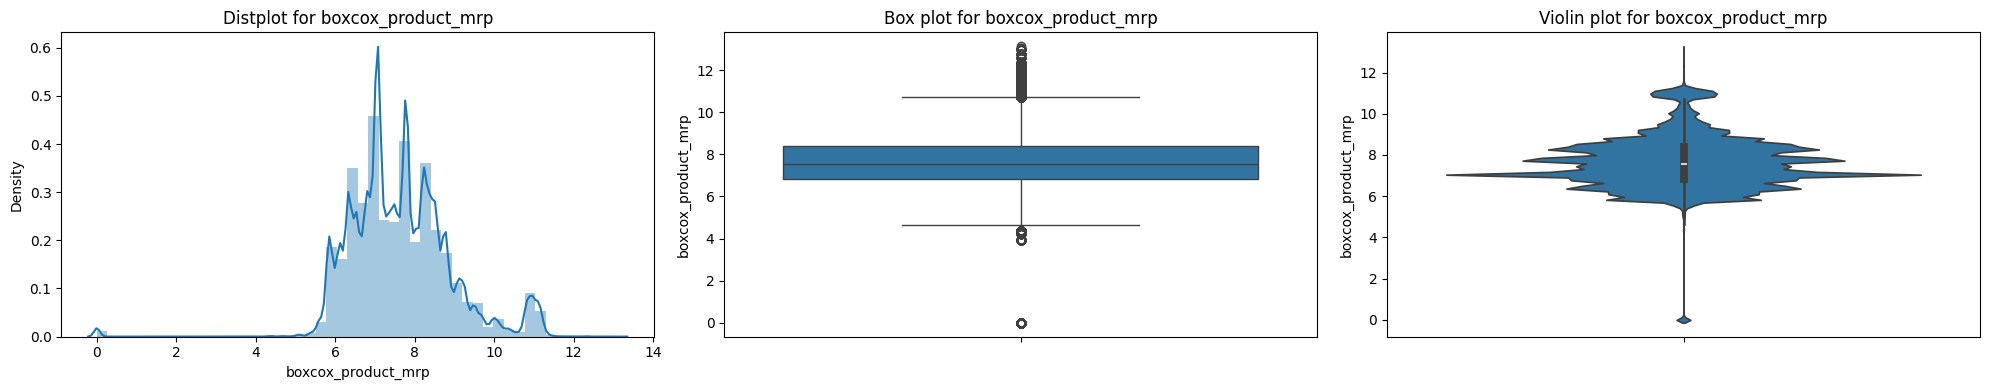

<ipython-input-17-ec0408c78dcf>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




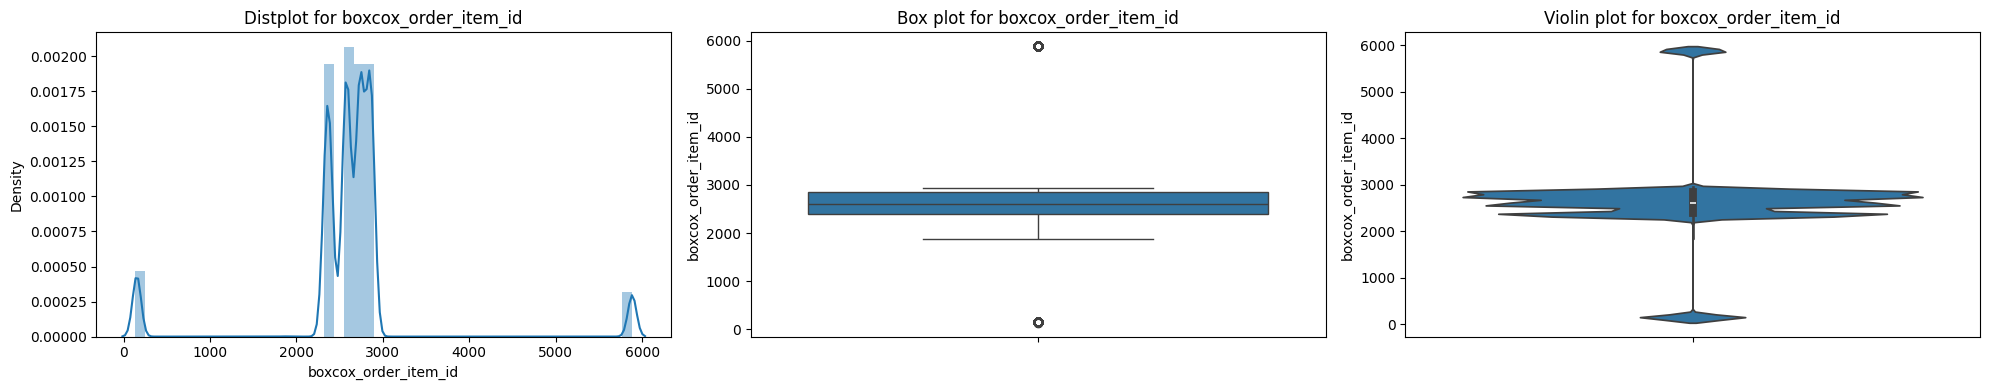

<ipython-input-17-ec0408c78dcf>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




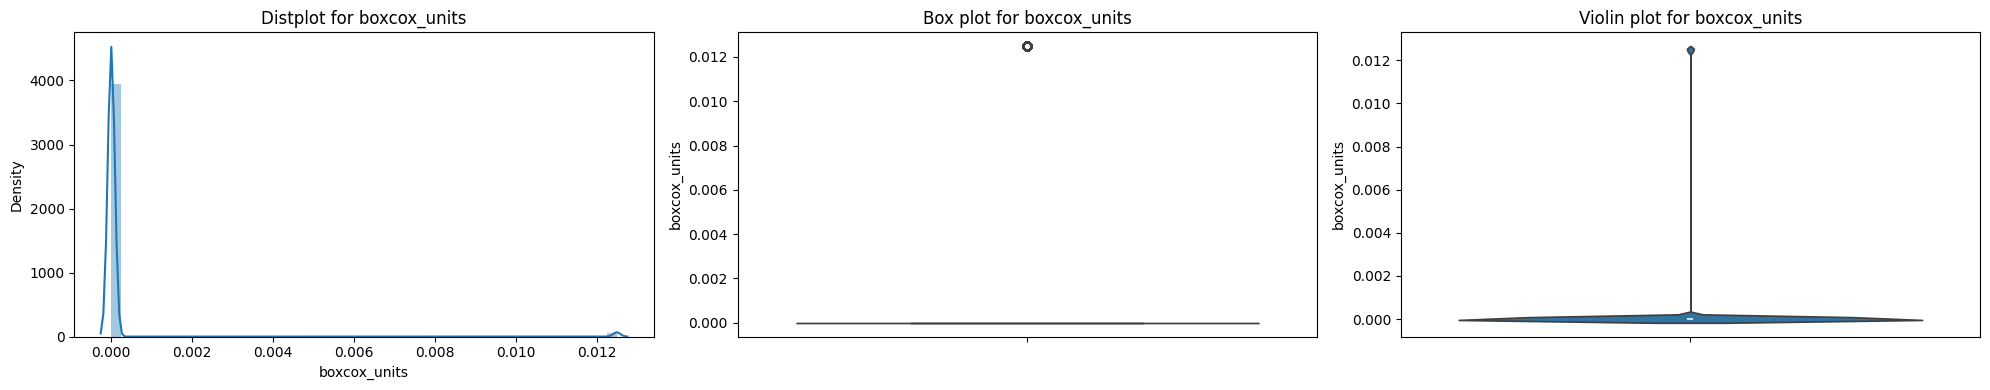

<ipython-input-17-ec0408c78dcf>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




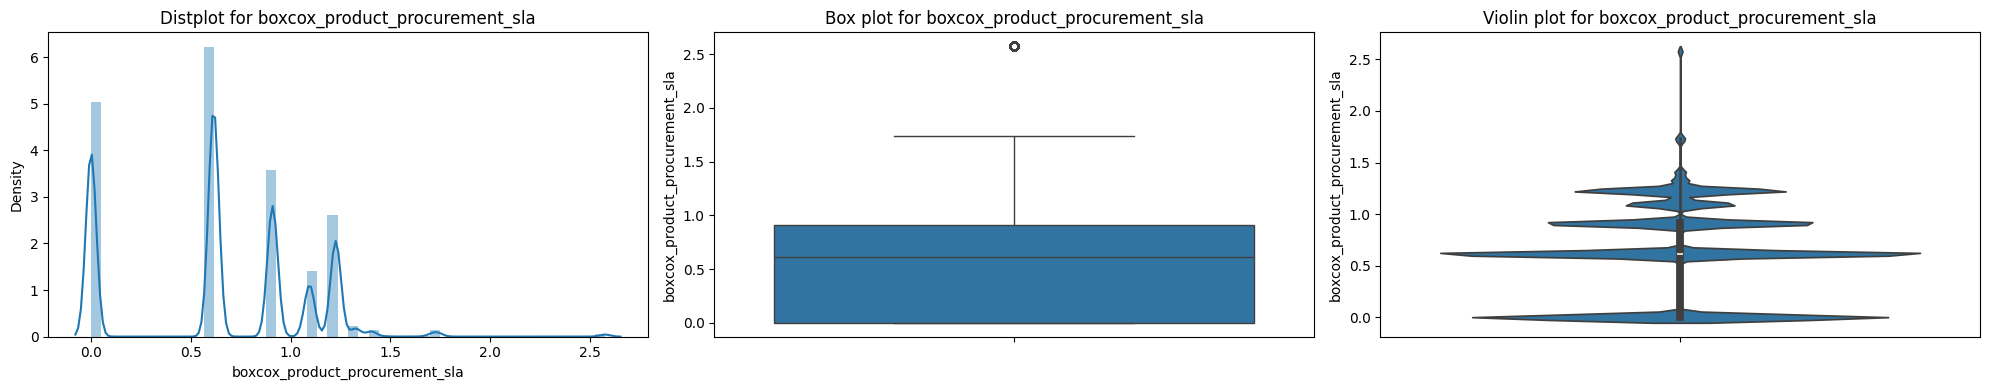

In [ ]:
skwed_columns_2=['boxcox_order_id', 'boxcox_sla', 'boxcox_product_mrp','boxcox_order_item_id', 'boxcox_units', 'boxcox_product_procurement_sla']
for column in skwed_columns_2:
   skewplot(df,column)


In [ ]:


df2= df.copy()
df2.head(1)

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,boxcox_order_item_id,boxcox_units,boxcox_product_procurement_sla,boxcox_order_id,boxcox_product_mrp,boxcox_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,\N,\N,...,CameraAccessory,CameraTripod,7190,0,2723.276627,0.0,0.0,1.156404e+09,9.137271,2.546098


In [ ]:
# Outliers Handling - Interquartile Range(IQR) Method

def outliers(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)

In [ ]:
outlier_columns= ['boxcox_order_id', 'boxcox_sla', 'boxcox_product_mrp','boxcox_order_item_id', 'boxcox_units', 'boxcox_product_procurement_sla']
for i in outlier_columns:
  outliers(df2,i)

In [ ]:
df2.describe().T


,count,mean,min,25%,50%,75%,max,std
order_date,1648824,2016-01-10 05:24:13.429956608,2015-05-19 13:42:09,2015-10-16 17:40:54.249999872,2016-01-07 12:39:11.500000,2016-04-01 13:12:09.500000,2016-07-25 01:19:45,NaN
Year,1648824.0,2015.518555,2015.0,2015.0,2016.0,2016.0,2016.0,0.499656
Month,1648824.0,6.58565,1.0,3.0,6.0,10.0,12.0,3.623351
order_id,1648824.0,2842444674146622.0,76331515.0,1602588503969575.0,2611824528743350.0,3610613539366250.0,5395076790260600.0,1269134332596903.5
order_item_id,1648824.0,13756277530325592.0,108016495.0,1606725138262300.0,2619185472741150.0,4397705931628400.0,300037347717704000.0,55945981798628056.0
gmv,1648824.0,2453.803858,0.0,339.0,749.0,1999.0,226947.0,5612.080628
units,1648824.0,1.022087,1.0,1.0,1.0,1.0,50.0,0.253532
sla,1648824.0,5.687832,0.0,4.0,6.0,7.0,1006.0,2.983336
cust_id,1648824.0,-7036694961914080.0,-9223350545281059840.0,-4603053788010787840.0,0.0,4589762297030790144.0,9223362162226820096.0,5319135676421964800.0
pincode,1648824.0,99914695674114880.0,-9221830354194010112.0,-4405798775245490176.0,122432559963907008.0,4771923573051750400.0,9222980202332239872.0,5305074846267633664.0


<ipython-input-17-ec0408c78dcf>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




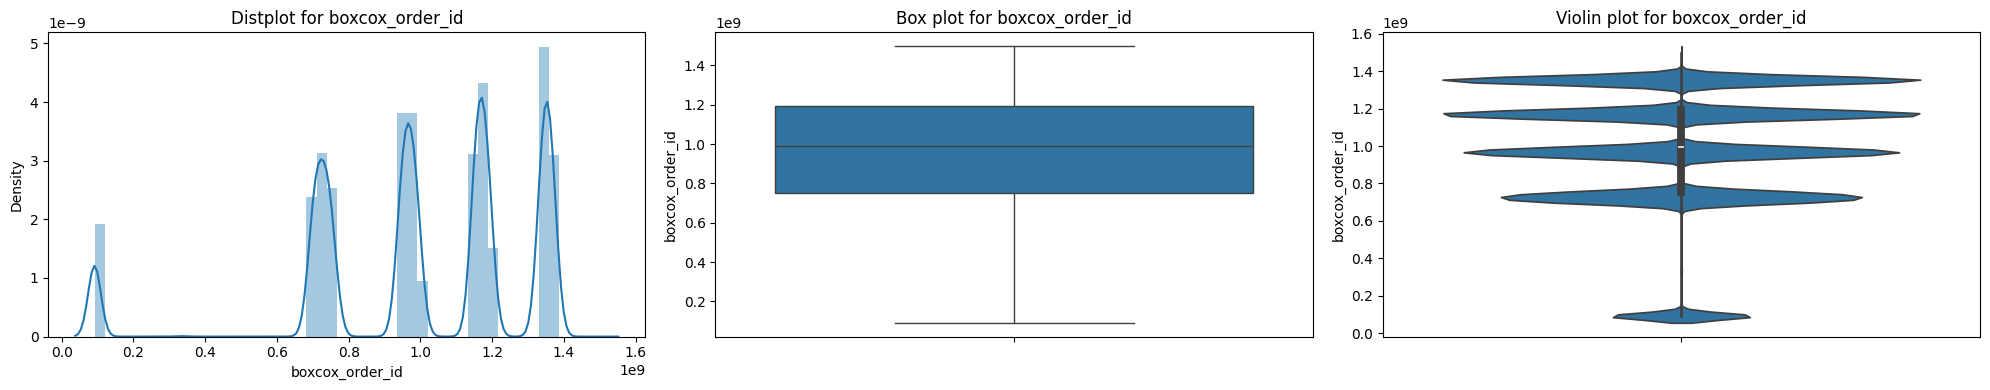

<ipython-input-17-ec0408c78dcf>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




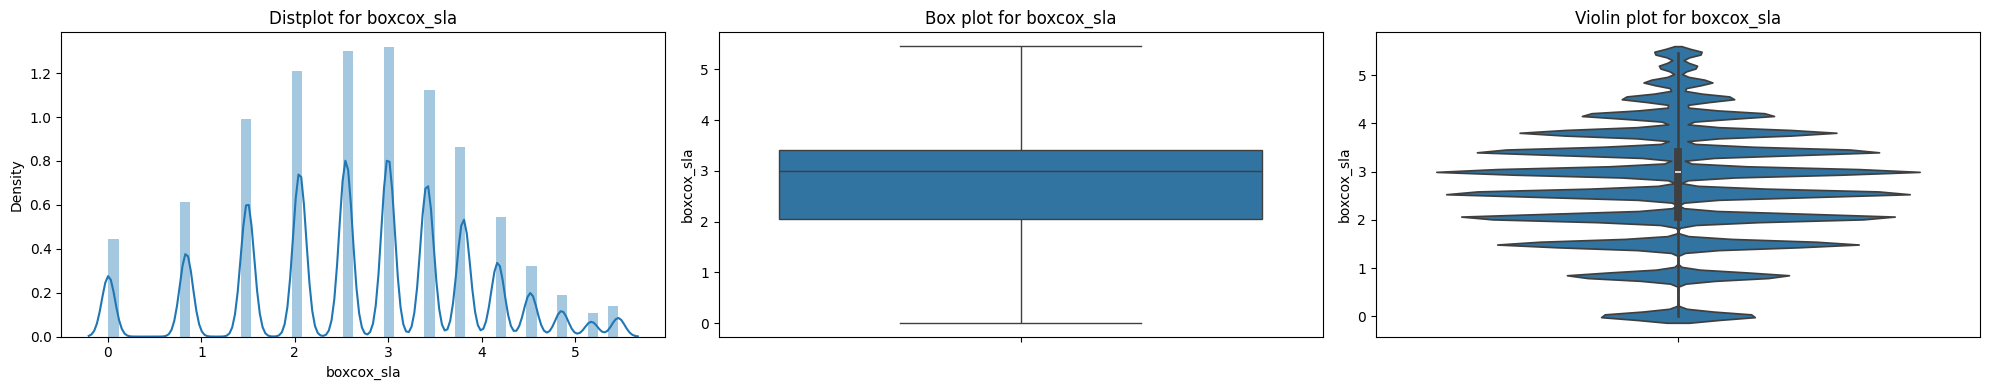

<ipython-input-17-ec0408c78dcf>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




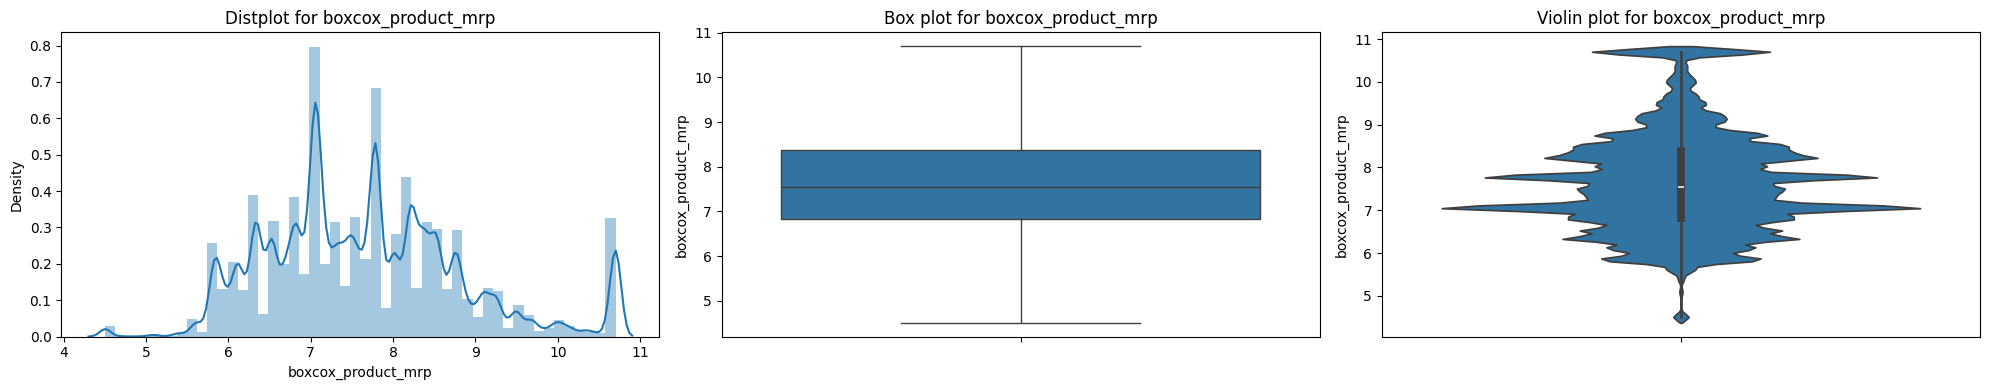

<ipython-input-17-ec0408c78dcf>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




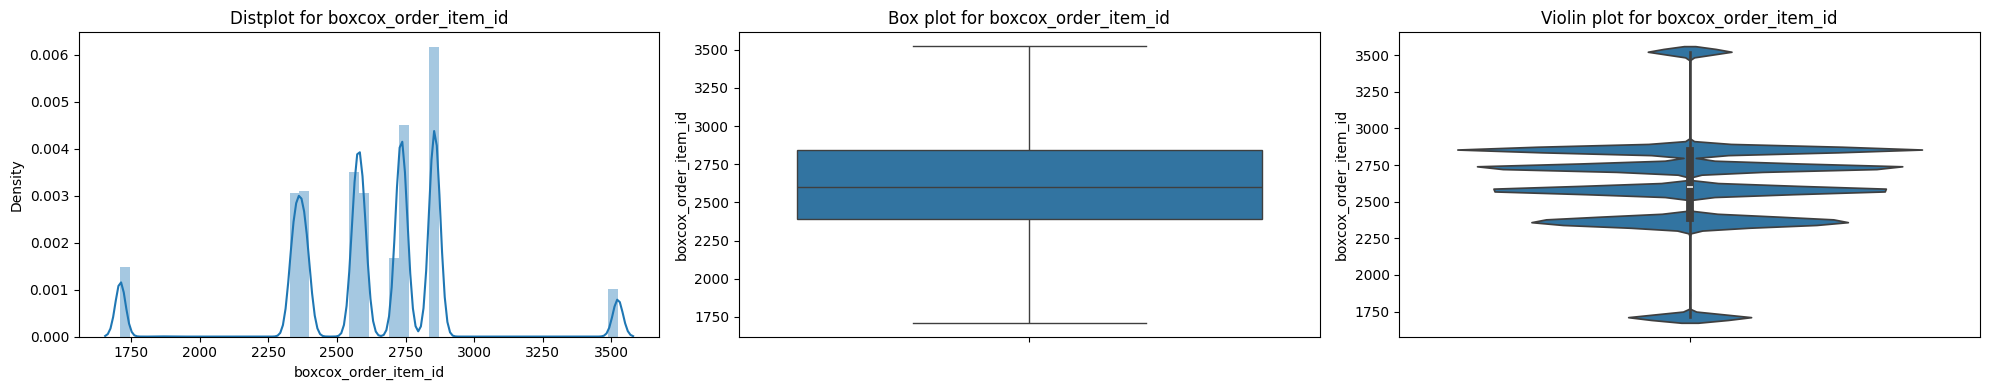

<ipython-input-17-ec0408c78dcf>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



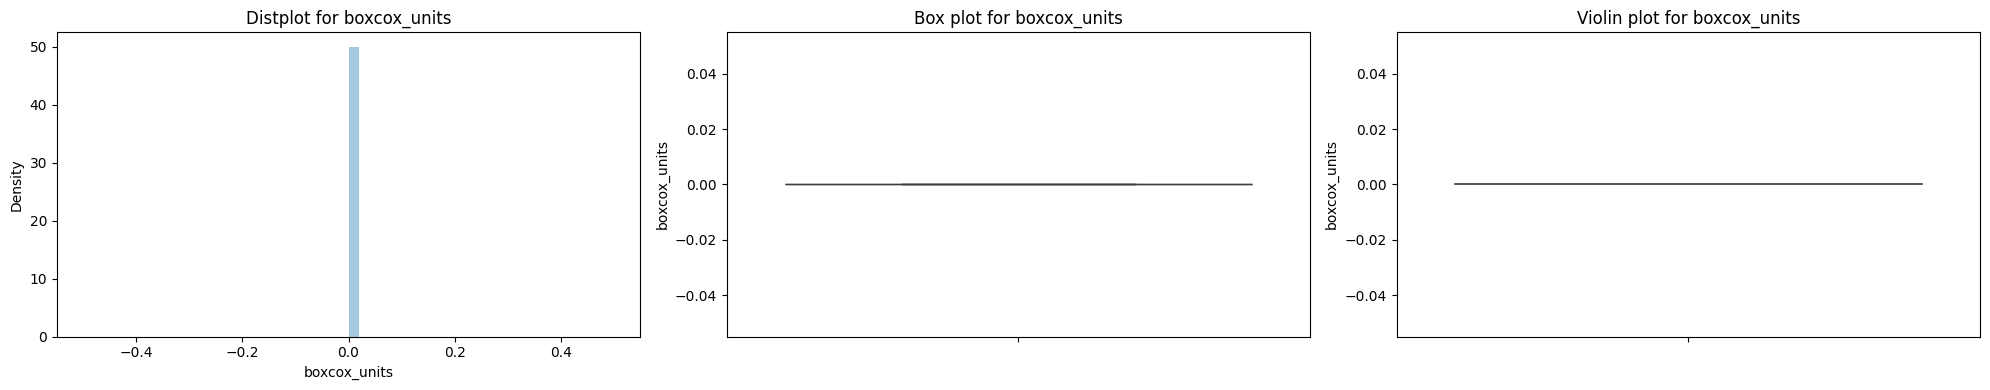

<ipython-input-17-ec0408c78dcf>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




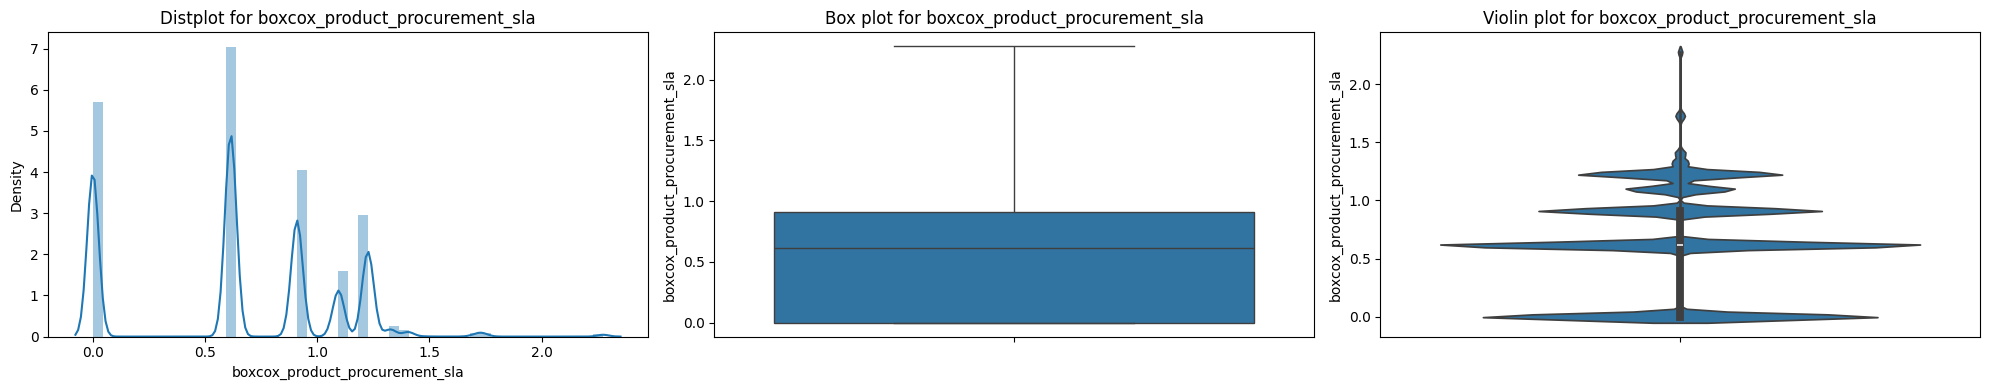

In [ ]:
for i in outlier_columns:
  skewplot(df2,i)

In [ ]:
from sklearn.model_selection import train_test_split                                      # import neccesary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 26 columns):
 #   Column                           Non-Null Count    Dtype         
---  ------                           --------------    -----         
 0   fsn_id                           1648824 non-null  object        
 1   order_date                       1648824 non-null  datetime64[ns]
 2   Year                             1648824 non-null  int64         
 3   Month                            1648824 non-null  int64         
 4   order_id                         1648824 non-null  float64       
 5   order_item_id                    1648824 non-null  float64       
 6   gmv                              1648824 non-null  int64         
 7   units                            1648824 non-null  int64         
 8   deliverybdays                    1648824 non-null  object        
 9   deliverycdays                    1648824 non-null  object        
 10  s1_fact.order_payment_type    

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'])   # handling irrelavant data types
df['week'] = df['order_date'].dt.isocalendar().week


In [ ]:
weekly_data = df.groupby(['week', 'product_analytic_sub_category']).agg({
    'gmv': 'sum',
    'units': 'sum',
    'sla': 'mean',
    # other relevant features
}).reset_index()


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is your main dataset
df = df2.copy()  # Copying dataset

# Group data weekly and by subcategory
df['order_date'] = pd.to_datetime(df['order_date'])
df['week'] = df['order_date'].dt.isocalendar().week
df['year'] = df['order_date'].dt.year

# Aggregating data at weekly level for each subcategory
weekly_data = df.groupby(['year', 'week', 'product_analytic_sub_category']).agg({
    'gmv': 'sum',
    'order_item_id': 'count'
}).reset_index()

# Separate subcategories
df_camera = weekly_data[weekly_data['product_analytic_sub_category'] == 'CameraAccessory']
df_home = weekly_data[weekly_data['product_analytic_sub_category'] == 'HomeAudio']
df_gaming = weekly_data[weekly_data['product_analytic_sub_category'] == 'GamingAccessory']


predictors = ['week', 'order_item_id']  # Using 'week' and frequency of orders as predictors
target = 'gmv'

def train_and_evaluate(X, y, category_name):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    dt_model = DecisionTreeRegressor(random_state=42)                      # Initialize the Decision Tree Regressor

    dt_model.fit(X_train, y_train)         # Fit the model

    y_pred = dt_model.predict(X_test)      # Make predictions

    rmse = mean_squared_error(y_test, y_pred, squared=False)  # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    print(f"{category_name} - RMSE: {rmse}, R² Score: {r2}")

# Train and evaluate models for each subcategory
X_camera = df_camera[predictors]
y_camera = df_camera[target]
X_home = df_home[predictors]
y_home = df_home[target]
X_gaming = df_gaming[predictors]
y_gaming = df_gaming[target]

# Check if there's data before training for each subcategory
if len(X_camera) > 0:
    train_and_evaluate(X_camera, y_camera, "Camera Accessory")
else:
    print("No data available for Camera Accessory")

if len(X_home) > 0:
    train_and_evaluate(X_home, y_home, "Home Audio")
else:
    print("No data available for Home Audio")

if len(X_gaming) > 0:
    train_and_evaluate(X_gaming, y_gaming, "Gaming Accessory")
else:
    print("No data available for Gaming Accessory")


Camera Accessory - RMSE: 1420425.279895661, R² Score: 0.7600274320170503
Home Audio - RMSE: 182301.06932713857, R² Score: 0.9920922608584172
Gaming Accessory - RMSE: 331395.75537163013, R² Score: 0.964066030137821


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



MSE: 918825762323.7094
MAE: 711261.2313517382
RMSE: 958553.9955180978
R²: 0.7521785278758327


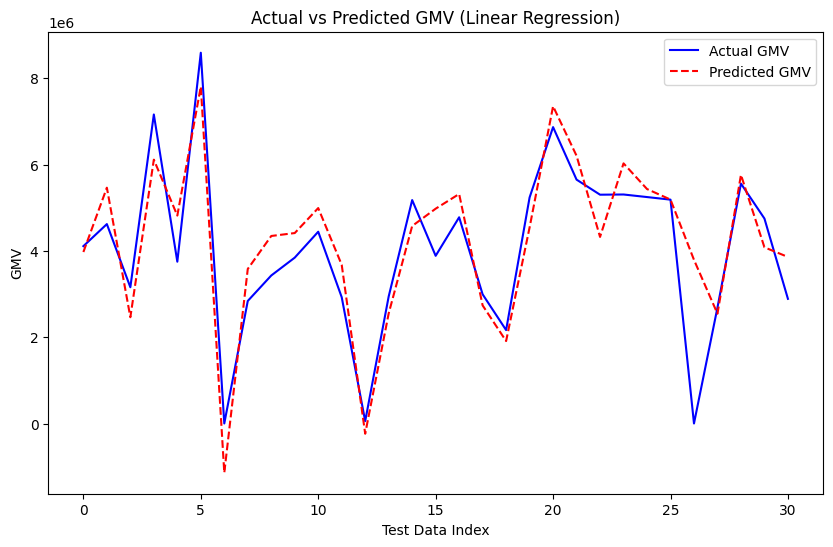

                                                Coefficient
week                                           1.533941e+04
units                                          1.111668e+03
product_mrp                                    4.957615e+02
sla                                            2.540562e+05
product_procurement_sla                       -9.138754e+05
product_analytic_sub_category_GamingAccessory -1.100369e+06
product_analytic_sub_category_HomeAudio        1.828950e+06


In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


df['order_date'] = pd.to_datetime(df['order_date'])
df['week'] = df['order_date'].dt.isocalendar().week

weekly_data = df.groupby(['week', 'product_analytic_sub_category']).agg({
    'gmv': 'sum',
    'units': 'sum',
    'product_mrp': 'mean',
    'sla': 'mean',
    'product_procurement_sla': 'mean'
}).reset_index()


subcategories = ['CameraAccessory', 'HomeAudio', 'GamingAccessory']                                          # Filter data for specific subcategories
weekly_data_filtered = weekly_data[weekly_data['product_analytic_sub_category'].isin(subcategories)]


weekly_data_encoded = pd.get_dummies(weekly_data_filtered, columns=['product_analytic_sub_category'], drop_first=True) # One-hot encode the 'product_analytic_sub_category' column

X = weekly_data_encoded.drop(columns=['gmv'])
y = weekly_data_encoded['gmv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)      # Split the data

model = LinearRegression()                             # Create and fit
model.fit(X_train, y_train)

y_pred = model.predict(X_test)                         # Make predictions

mse = mean_squared_error(y_test, y_pred)               # Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

# Plot Actual vs Predicted GMV
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual GMV', color='blue')
plt.plot(y_pred, label='Predicted GMV', color='red', linestyle='--')
plt.title('Actual vs Predicted GMV (Linear Regression)')
plt.xlabel('Test Data Index')
plt.ylabel('GMV')
plt.legend()
plt.show()

# Check feature coefficients
coefficients = pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficient'])
print(coefficients)



In [ ]:

import pandas as pd

df2['revenue_growth_rate'] = df2['gmv'].pct_change() * 100
df2['AOV'] = df2['gmv'] / df2['units']


actual_revenue = df2['gmv'].values                                                                        #  Mean Absolute Error
forecast_revenue = actual_revenue * (1 + (df2['revenue_growth_rate'].shift(1) / 100)).fillna(1)
mae = (abs(actual_revenue - forecast_revenue)).mean()


mape = (abs((actual_revenue - forecast_revenue) / actual_revenue)).mean() * 100                  # Mean Absolute Percentage Error

# Customer Retention Rate
customers_start = 1000
new_customers = 300
customers_end = 950
retention_rate = ((customers_end - new_customers) / customers_start) * 100

# Print KPIs
print(f"Revenue Growth Rate: {df2['revenue_growth_rate'].dropna()}")
print(f"Average Order Value (AOV): {df2['AOV']}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Customer Retention Rate: {retention_rate}%")

Revenue Growth Rate: 1            7.812500
2          -71.159420
3          -15.075377
4           -4.260355
5          105.438813
              ...    
1648819      4.761905
1648820     -4.636364
1648821      0.000000
1648822      4.861773
1648823      4.318182
Name: revenue_growth_rate, Length: 1647680, dtype: float64
Average Order Value (AOV): 0          6400.0
1          6900.0
2          1990.0
3          1690.0
4          1618.0
            ...  
1648819    2200.0
1648820    2098.0
1648821    2098.0
1648822    2200.0
1648823    2295.0
Name: AOV, Length: 1648824, dtype: float64
Mean Absolute Error (MAE): inf
Mean Absolute Percentage Error (MAPE): inf%
Customer Retention Rate: 65.0%


In [ ]:
df2['Week'] = df2['order_date'].dt.isocalendar().week

In [ ]:

# Replace invalid entries ('\N') in 'deliverybdays' and 'deliverycdays' with NaN

df['deliverybdays'] = df['deliverybdays'].replace(r'\N', np.NaN)
df['deliverycdays'] = df['deliverycdays'].replace(r'\N',np.NaN)

df2['deliverybdays'] = df['deliverybdays'].replace(r'\N', np.NaN)
df2['deliverycdays'] = df['deliverycdays'].replace(r'\N',np.NaN)

In [ ]:

# As mentioned, Filter for relevant product subcategories

camera_accessory = df[df['product_analytic_sub_category'] == 'CameraAccessory']
home_audio = df[df['product_analytic_sub_category'] == 'HomeAudio']
gaming_accessory = df[df['product_analytic_sub_category'] == 'GamingAccessory']


In [ ]:

df.dropna(subset=['deliverybdays'], inplace=True)
df.dropna(subset=['deliverycdays'], inplace=True)
df2.dropna(subset=['deliverybdays'], inplace=True)
df2.dropna(subset=['deliverycdays'], inplace=True)

In [ ]:

df2.shape

(335852, 29)

In [ ]:

print(camera_accessory)

                   fsn_id          order_date  Year  Month      order_id  \
0        ACCCX3S58G7B5F6P 2015-10-17 15:11:54  2015     10  3.419301e+15   
1        ACCCX3S58G7B5F6P 2015-10-19 10:07:22  2015     10  1.420831e+15   
2        ACCCX3S5AHMF55FV 2015-10-20 15:45:56  2015     10  2.421913e+15   
3        ACCCX3S5AHMF55FV 2015-10-14 12:05:15  2015     10  4.416592e+15   
4        ACCCX3S5AHMF55FV 2015-10-17 21:25:03  2015     10  4.419525e+15   
...                   ...                 ...   ...    ...           ...   
1645038  TESEF5TXGENRWH63 2015-09-24 10:06:09  2015      9  2.399245e+15   
1645039  TESEF5TXGENRWH63 2015-09-02 19:32:02  2015      9  2.378843e+15   
1645040  TESEF5TXGENRWH63 2015-09-14 16:27:04  2015      9  2.390833e+15   
1645041  TESEF5TXGENRWH63 2015-09-24 12:44:24  2015      9  1.399341e+15   
1645042  TESEF5TXGENRWH63 2015-09-18 15:09:05  2015      9  1.394239e+15   

         order_item_id   gmv  units deliverybdays deliverycdays  ...  \
0         3.419

In [ ]:

print(home_audio)

                   fsn_id          order_date  Year  Month      order_id  \
2840     ACCCZZC9XHZZ49FS 2015-10-03 20:35:30  2015     10  1.407396e+15   
2841     ACCCZZC9XHZZ49FS 2015-10-16 09:03:09  2015     10  2.418214e+15   
2842     ACCCZZC9XHZZ49FS 2015-10-16 21:55:31  2015     10  2.418676e+15   
2843     ACCCZZC9XHZZ49FS 2015-10-16 23:25:07  2015     10  1.418727e+15   
2844     ACCCZZC9XHZZ49FS 2015-10-20 17:42:59  2015     10  2.421984e+15   
...                   ...                 ...   ...    ...           ...   
1647201  VOREYV2HWZDUFZ9Y 2015-09-29 23:19:16  2015      9  4.404040e+15   
1647202  VOREYV2HWZDUFZ9Y 2015-09-30 22:08:55  2015      9  2.404860e+15   
1647203  VOREYV2HWZDUFZ9Y 2015-09-06 22:14:34  2015      9  3.381988e+15   
1647204  VOREYV2HWZDUFZ9Y 2015-09-11 16:11:52  2015      9  2.388232e+15   
1647205  VOREYV2HWZDUFZ9Y 2015-09-22 10:25:36  2015      9  1.397525e+15   

         order_item_id   gmv  units deliverybdays deliverycdays  ...  \
2840      1.407

In [ ]:

print(gaming_accessory)

                   fsn_id          order_date  Year  Month      order_id  \
1598     ACCCZ34CBVZJTVQF 2015-10-04 19:24:36  2015     10  1.408217e+15   
1599     ACCCZ34CBVZJTVQF 2015-10-14 22:54:54  2015     10  1.416985e+15   
1600     ACCCZ34CBVZJTVQF 2015-10-15 20:19:38  2015     10  1.417669e+15   
1601     ACCCZ34CBVZJTVQF 2015-10-17 18:21:43  2015     10  1.419415e+15   
1602     ACCCZ34CBVZJTVQF 2015-10-26 17:49:39  2015     10  1.427168e+15   
...                   ...                 ...   ...    ...           ...   
1613075  ACCEYYWVUFYFYHDA 2015-09-13 21:02:03  2015      9  4.390135e+15   
1613076  ACCEYYWVUFYFYHDA 2015-09-25 23:15:24  2015      9  1.400584e+15   
1613077  ACCEYYWVUFYFYHDA 2015-09-28 09:35:33  2015      9  2.402683e+15   
1613078  ACCEYYWVUFYFYHDA 2015-09-03 07:46:40  2015      9  2.378843e+15   
1613079  ACCEYYWVUFYFYHDA 2015-09-19 10:36:28  2015      9  4.394943e+15   

         order_item_id   gmv  units deliverybdays deliverycdays  ...  \
1598      1.408

In [ ]:

# Group by subcategory and week to get weekly aggregates for GMV and units
camera_weekly = df2[df2['product_analytic_sub_category'] == 'CameraAccessory'].groupby(['Week']).agg({
    'gmv': 'sum',
    'units': 'sum',
    'product_mrp': 'sum',
    'revenue_growth_rate': 'mean',
}).reset_index()
print(camera_weekly)

    Week      gmv  units  product_mrp  revenue_growth_rate
0      2      888      2         3980            23.200000
1      3      439      1         1000            10.025063
2      5      898      4         4480           -48.899876
3      7     3661      5        10553             3.779206
4      8      678      2         3980             0.000000
5      9     5098      8        11243             0.137094
6     10    35545     20        61766             4.079806
7     11   117869     72       214264            10.935307
8     12   235904    258       467891             1.242207
9     13  1482308   1626      2751374            16.919841
10    14  4326798   4563      8510336             8.876221
11    15  3771529   3957      7111136            11.785260
12    16  2458292   2329      4733319             5.615441
13    17  7043469   6873     13231342            11.275804
14    18  4865590   5063      9478047             9.902756
15    19  4841158   5005      9341252             9.1043

In [ ]:

home_audio = df2[df2['product_analytic_sub_category'] == 'HomeAudio'].groupby(['Week']).agg({
    'gmv': 'sum',
    'units': 'sum',
    'product_mrp': 'sum',
    'revenue_growth_rate': 'mean',

}).reset_index()
print(home_audio)


    Week      gmv  units  product_mrp  revenue_growth_rate
0      2     1150      1         1190             0.000000
1      4     1625      1         1735            -1.215805
2      5     2299      1         5399            -8.003201
3      6     5998      3         9168            -5.002501
4      7     8198      3        14848            -5.578801
5      8    15014      7        31444            -0.120465
6      9     6799      3         8949             4.896698
7     10    50552     22       108923             1.473128
8     11    64322     38       122934            -0.209060
9     12   207207    141       342007             0.030097
10    13   906258    534      1577199             8.440551
11    14  2657828   1346      4263685             5.962111
12    15  2436586   1207      3848262            15.206501
13    16  1571064    697      2484991            27.460262
14    17  4575652   2350      7460592            10.547513
15    18  2977635   1492      4777234            10.2913

In [ ]:

Gaming_Accessory = df2[df2['product_analytic_sub_category'] == 'GamingAccessory'].groupby(['Week']).agg({
    'gmv': 'sum',
    'units': 'sum',
    'product_mrp': 'sum',
    'revenue_growth_rate': 'mean',
}).reset_index()

print(Gaming_Accessory)

    Week      gmv  units  product_mrp  revenue_growth_rate
0      2      998      1         1799           -16.063919
1      4     4060      1         5990             0.744417
2      5     3122      3         4710           182.820106
3      6     2480      2         3598             0.000000
4      7     7034      8        11434            -2.237130
5      8    28751     22        42629            -9.580580
6      9     7411     14        14876           -12.686295
7     10    19020     29        40407            -4.089755
8     11    41108     54        81230            -1.709033
9     12   243218    262       456756             5.476238
10    13   996154   1135      1706474            12.455627
11    14  2926582   2817      4654874             8.054547
12    15  2642225   2710      4374987            11.269891
13    16  1675677   1872      2790598             7.663389
14    17  4676900   5103      8296288                  inf
15    18  2839413   3096      5392248                  i

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = df2.copy()

# Select relevant columns
predictors = ['boxcox_order_item_id', 'boxcox_units', 'boxcox_product_procurement_sla',
              'boxcox_order_id', 'boxcox_product_mrp', 'boxcox_sla']

label_encoder = LabelEncoder()
df['order_payment_type_encoded'] = label_encoder.fit_transform(df['s1_fact.order_payment_type'])

predictors.append('order_payment_type_encoded')        # Add the encoded column
target = 'gmv'


X = df[predictors]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reduce the number of training samples to 20% of the original
X_train_reduced = X_train.sample(frac=0.2, random_state=42)
y_train_reduced = y_train.loc[X_train_reduced.index]

noise_train = np.random.normal(0, 1, X_train_reduced.shape)  # noise for training data
X_train_noisy = X_train_reduced + noise_train

noise_test = np.random.normal(0, 1, X_test.shape)  # noise for testing data
X_test_noisy = X_test + noise_test

# Train a simple model
model = RandomForestRegressor(n_estimators=10, max_depth=3, random_state=42)
model.fit(X_train_noisy, y_train_reduced)

y_pred = model.predict(X_test_noisy)

# evaluate
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


RMSE: 4297.484862587988
R² Score: 0.4476263653378977


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras


Epoch 1/50
21495/21495 [==============================] - 34s 2ms/step - loss: 14224695.0000 - mse: 14224695.0000 - val_loss: 3073816.0000 - val_mse: 3073816.0000
Epoch 2/50
21495/21495 [==============================] - 34s 2ms/step - loss: 10581598.0000 - mse: 10581599.0000 - val_loss: 2521620.5000 - val_mse: 2521620.5000
Epoch 3/50
21495/21495 [==============================] - 33s 2ms/step - loss: 9843799.0000 - mse: 9843798.0000 - val_loss: 2519533.0000 - val_mse: 2519533.5000
Epoch 4/50
21495/21495 [==============================] - 33s 2ms/step - loss: 9741830.0000 - mse: 9741830.0000 - val_loss: 2798777.5000 - val_mse: 2798777.5000
Epoch 5/50
21495/21495 [==============================] - 34s 2ms/step - loss: 9743777.0000 - mse: 9743777.0000 - val_loss: 3497485.0000 - val_mse: 3497484.7500
Epoch 6/50
21495/21495 [==============================] - 33s 2ms/step - loss: 9298824.0000 - mse: 9298824.0000 - val_loss: 2585460.0000 - val_mse: 2585460.0000
Epoch 7/50
21495/21495 [======

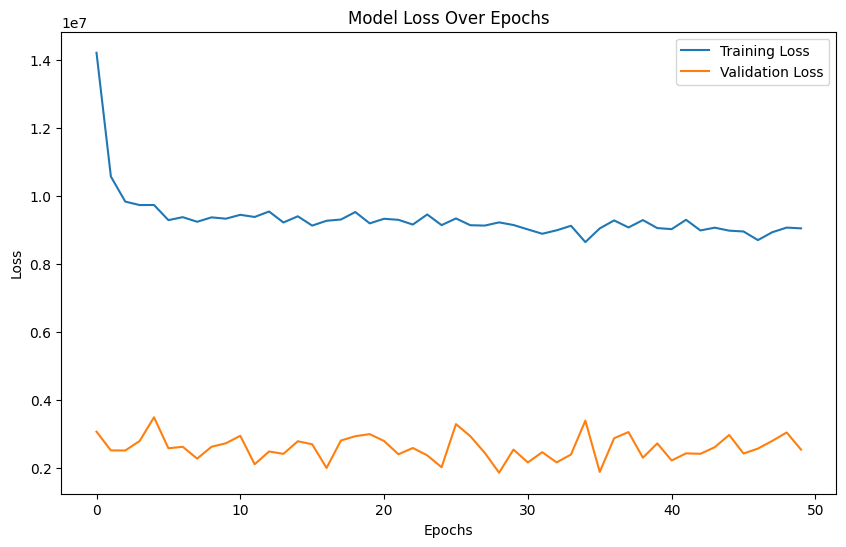

In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


X = df2.drop(columns=['gmv', 'order_id', 'order_item_id', 'revenue_growth_rate', 's1_fact.order_payment_type', 'cust_id', 'pincode'])  # Features
y = df2['gmv']  # Target variable (weekly revenue)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=[float, int]))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=[float, int]))

#
from tensorflow.keras.layers import LeakyReLU

model = Sequential()
model.add(Dense(20, input_dim=X_train_scaled.shape[1]))
model.add(LeakyReLU(alpha=0.1))  # Changed to LeakyReLU
model.add(Dropout(0.5))  # Dropout rate to prevent overfitting
model.add(Dense(10))
model.add(LeakyReLU(alpha=0.1))  # LeakyReLU for smoother learning
model.add(Dense(4))
model.add(LeakyReLU(alpha=0.1))  # LeakyReLU in all hidden layers
model.add(Dropout(0.5))  # Regularization with dropout
model.add(Dense(1, activation='linear'))  # Output layer for regression

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, validation_split=0.2)

# Evaluate the model
test_mse = model.evaluate(X_test_scaled, y_test)
print(f"Test Mean Squared Error: {test_mse}")
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Sklearn Test MSE: {mse}")
print(f"R² Score: {r2}")


# Plot training loss and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:

from tensorflow.keras.layers import LeakyReLU
X = df2.drop(columns=['gmv', 'order_id', 'order_item_id', 'revenue_growth_rate', 's1_fact.order_payment_type', 'cust_id', 'pincode'])  # Features
y = df2['gmv']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=[float, int]))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=[float, int]))


model = Sequential()
model.add(Dense(20, input_dim=X_train_scaled.shape[1]))
model.add(LeakyReLU(alpha=0.1))  # Changed to LeakyReLU
model.add(Dropout(0.5))  # Dropout rate to prevent overfitting
model.add(Dense(10))
model.add(LeakyReLU(alpha=0.1))  # LeakyReLU for smoother learning
model.add(Dense(8))
model.add(LeakyReLU(alpha=0.1))  # LeakyReLU in all hidden layers
model.add(Dropout(0.5))  # Regularization with dropout
model.add(Dense(1, activation='linear'))  # Output layer for regression


model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=10, validation_split=0.2)

# Evaluate the model
test_mse = model.evaluate(X_test_scaled, y_test)
print(f"Test Mean Squared Error: {test_mse}")

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


Epoch 1/20
21495/21495 [==============================] - 34s 2ms/step - loss: 10280509.0000 - mse: 10280509.0000 - val_loss: 1588826.5000 - val_mse: 1588826.5000
Epoch 2/20
21495/21495 [==============================] - 34s 2ms/step - loss: 6808043.5000 - mse: 6808043.5000 - val_loss: 1945112.1250 - val_mse: 1945112.1250
Epoch 3/20
21495/21495 [==============================] - 34s 2ms/step - loss: 6401257.0000 - mse: 6401257.0000 - val_loss: 1540288.1250 - val_mse: 1540288.1250
Epoch 4/20
21495/21495 [==============================] - 34s 2ms/step - loss: 6455115.0000 - mse: 6455115.0000 - val_loss: 1426328.5000 - val_mse: 1426328.5000
Epoch 5/20
21495/21495 [==============================] - 33s 2ms/step - loss: 6251884.0000 - mse: 6251884.0000 - val_loss: 1282217.2500 - val_mse: 1282217.2500
Epoch 6/20
21495/21495 [==============================] - 33s 2ms/step - loss: 6136786.5000 - mse: 6136786.5000 - val_loss: 1534744.1250 - val_mse: 1534744.1250
Epoch 7/20
21495/21495 [========

In [ ]:

print(f"Sklearn Test MSE: {mse}")

Sklearn Test MSE: 1407156.776136546


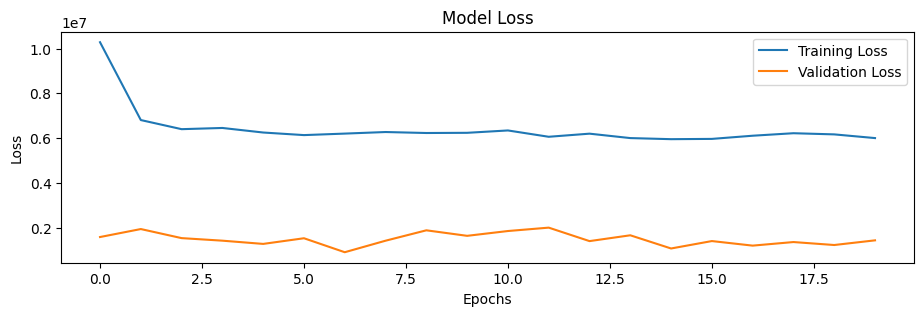

In [ ]:

plt.figure(figsize=(11, 3))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()